
********** Data Preprocessing ***********
Features Dictionary Contains:
3 Interval, 
1 Binary, and 
16 Nominal Attribute(s).

Data contains 1000 observations & 21 columns.

purpose:
	564 missing: Drop this attribute.

Attribute Counts
............... Missing  Outliers
checking..         0         0
duration..        42         0
history...         0         0
amount....        12         9
savings...         4         2
employed..         0         0
installp..         0         0
marital...         9         5
coapp.....        12         0
resident..        11         0
property..         0         0
age.......        35         6
other.....         0         0
housing...         0         0
existcr...         0         0
job.......         0         0
depends...         0         0
telephon..        19         0
foreign...         0         0
good_bad..         0         0

Statistics of the attribute age:
 count    1000.000000
mean       35.544317
std        11.235484
min        1

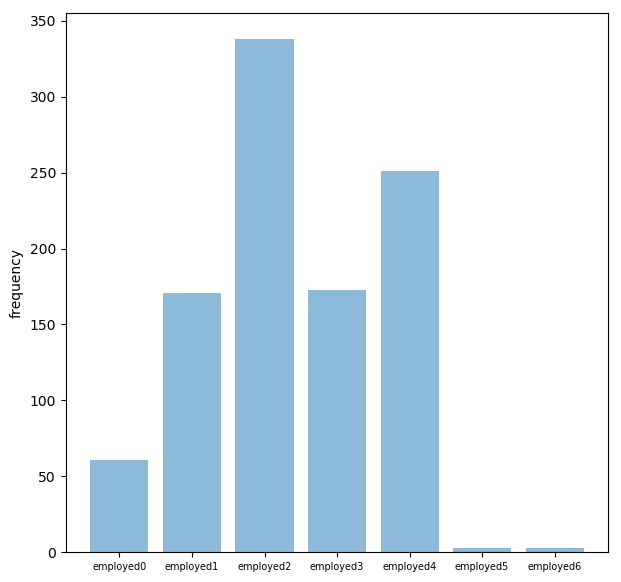



frequency of the attribute "marital":

   marital_Categories  Frequency
0           marital0       49.0
1           marital1      307.0
2           marital2      555.0
3           marital3       89.0


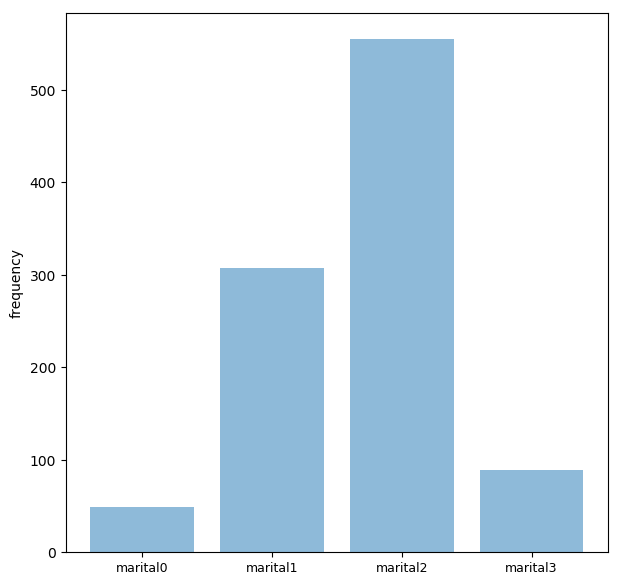



frequency of the attribute "savings":

   savings_Categories  Frequency
0           savings0      606.0
1           savings1      102.0
2           savings2       62.0
3           savings3       48.0
4           savings4      182.0


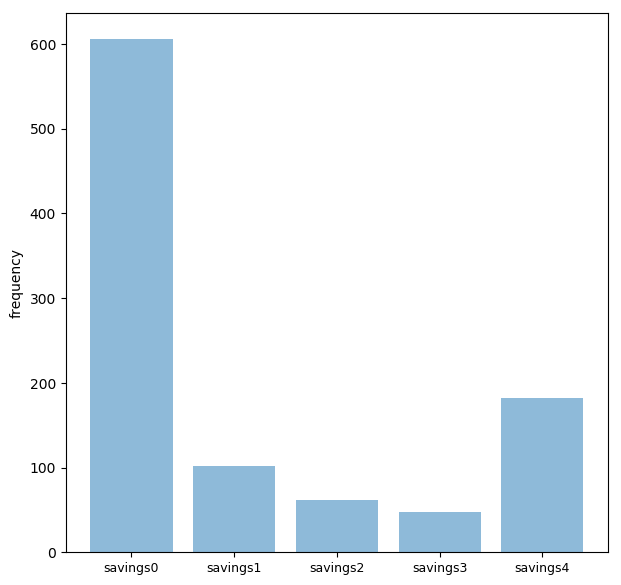


Coefficients:
Intercept..        -1.1407
duration...         0.0265
amount.....         0.0001
age........        -0.0134
good_bad...         0.7715
checking0..         0.3678
checking1..        -0.1264
checking2..         0.5339
history0...         0.6207
history1...        -0.0208
history2...        -0.2475
history3...         0.5317
savings0...         0.3162
savings1...         0.1405
savings2...        -0.6208
savings3...        -0.0552
employed0..         0.1618
employed1..        -0.1063
employed2..        -0.5604
employed3..        -0.2083
employed4..        -0.0140
employed5..        -0.3625
installp0..        -0.1970
installp1..         0.0930
installp2..         0.4139
marital0...         0.1143
marital1...        -0.4185
marital2...         0.1688
coapp0.....         0.6086
coapp1.....        -0.3602
resident0..         0.3339
resident1..         0.0897
resident2..        -0.3252
property0..        -0.0434
property1..        -0.1682
property2..         0.2162
other0.....  

In [13]:
import sys
from ReplaceImputeEncode import ReplaceImputeEncode
from Class_regression import logreg
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression

df = pd.read_excel('/Users/Pawan/Desktop/MS Folder/4th Sem/STAT 656/Week 4/Assignment/credithistory_HW2(1).xlsx')

attribute_map = {
    'checking':[2,(1,2,3,4),[0,0]],
    'duration':[0,(0,100),[0,0]],
    'history':[2,(0,1,2,3,4),[0,0]],
    'amount':[0,(0,20000),[0,0]],
    'savings':[2,(1,2,3,4,5),[0,0]],
    'employed':[2,(1,2,3,4,5,6,7),[0,0]],
    'installp':[2,(1,2,3,4),[0,0]],
    'marital':[2,(1,2,3,4),[0,0]],
    'coapp':[2,(1,2,3),[0,0]],
    'resident':[2,(1,2,3,4),[0,0]],
    'property':[2,(1,2,3,4),[0,0]],
    'age':[0,(1,120),[0,0]],
    'other':[2,(1,2,3),[0,0]],
    'housing':[2,(1,2,3),[0,0]],
    'existcr':[2,(1,2,3,4),[0,0]],
    'job':[2,(1,2,3,4),[0,0]],
    'depends':[2,(1,2),[0,0]],
    'telephon':[2,(1,2),[0,0]],
    'foreign':[2,(1,2),[0,0]],
    'good_bad':[1,('bad','good'),[0,0]]}


rie = ReplaceImputeEncode(data_map=attribute_map,nominal_encoding='SAS', display=True)
encoded_df = rie.fit_transform(df)

stat_age = encoded_df['age'].describe()
stat_amount = encoded_df['amount'].describe()
stat_duration = encoded_df['duration'].describe()
print('\nStatistics of the attribute age:\n',stat_age,\
      '\n\nStatistics of the attribute amount:\n',stat_amount,\
      '\n\nStatistics of the attribute duration:\n',stat_duration)


rie1 = ReplaceImputeEncode(data_map=attribute_map,nominal_encoding='one-hot', display=False)
encoded_df1 = rie1.fit_transform(df)

employed ={}
for i in range(6):
    str = 'employed'+"%i" %(i)
    employed[str]=encoded_df1[str].sum()
sum_employed = 0
for i in range(len(employed)):
    sum_employed = sum_employed + list(employed.values())[i]
employed['employed6'] = 1000-sum_employed
employed = pd.DataFrame(list(employed.items()))
employed.rename(columns={0: 'employed_Categories', 1: 'Frequency'},  inplace=True)

print('\n\nfrequency of the attribute "employed":\n\n',employed)


objects = list(employed.iloc[:,0])
y_pos = np.arange(len(objects))
performance = list(employed.iloc[:,1])

rcParams['figure.figsize'] = 7,7
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,fontsize=7)
plt.ylabel('frequency')
 
plt.show()

marital ={}
for i in range(3):
    str = 'marital'+"%i" %(i)
    marital[str]=encoded_df1[str].sum()
sum_marital = 0
for i in range(len(marital)):
    sum_marital = sum_marital + list(marital.values())[i]
marital['marital3'] = 1000-sum_marital
marital = pd.DataFrame(list(marital.items()))
marital.rename(columns={0: 'marital_Categories', 1: 'Frequency'},  inplace=True)

print('\n\nfrequency of the attribute "marital":\n\n',marital)


objects = list(marital.iloc[:,0])
y_pos = np.arange(len(objects))
performance = list(marital.iloc[:,1])

rcParams['figure.figsize'] = 7,7
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,fontsize=9)
plt.ylabel('frequency')
 
plt.show()

savings ={}
for i in range(4):
    str = 'savings'+"%i" %(i)
    savings[str]=encoded_df1[str].sum()
sum_savings = 0
for i in range(len(savings)):
    sum_savings = sum_savings + list(savings.values())[i]
savings['savings4'] = 1000-sum_savings
savings = pd.DataFrame(list(savings.items()))
savings.rename(columns={0: 'savings_Categories', 1: 'Frequency'},  inplace=True)

print('\n\nfrequency of the attribute "savings":\n\n',savings)


objects = list(savings.iloc[:,0])
y_pos = np.arange(len(objects))
performance = list(savings.iloc[:,1])

rcParams['figure.figsize'] = 7,7
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,fontsize=9)
plt.ylabel('frequency')
 
plt.show()

# Regression requires numpy arrays containing all numeric values
y = np.asarray(encoded_df['good_bad']) 
# Drop the target, 'object'.  Axis=1 indicates the drop is for a column.
X = np.asarray(encoded_df.drop('good_bad', axis=1)) 


lgr = LogisticRegression()
lgr.fit(X,y)
logreg.display_coef(lgr, 47, 2, rie.col)
logreg.display_binary_metrics(lgr, X, y)


from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size = 0.3, random_state=7)
lgr_train = LogisticRegression()
lgr_train.fit(X_train, y_train)
print("\nTraining Data\nRandom Selection of 70% of Original Data")
logreg.display_binary_split_metrics(lgr_train, X_train, y_train, X_validate, y_validate)

from sklearn.model_selection import cross_val_score
lgr_4_scores = cross_val_score(lgr, X_train, y_train, cv=4)
print("\nAccuracy Scores by Fold: ", lgr_4_scores)
print("Accuracy Mean:      %.4f" %lgr_4_scores.mean())
print("Accuracy Std. Dev.: %.4f" %lgr_4_scores.std())